![Imagen](https://docs.google.com/uc?export=download&id=1rrUwI409dtetYdANj5ZhL1Z8O1Xj3IQK)  


    
El **INEGI** es un organismo público autónomo responsable de normar y coordinar el Sistema Nacional de Información Estadística y Geográfica, así como de captar y difundir información de México en cuanto al territorio, los recursos, la población y economía, que permita dar a conocer las características de nuestro país y ayudar a la toma de decisiones.

#### **INTEGRANTES DEL EQUIPO**
**_Alumno 1:_** Escamilla Gonzalez Juan Pedro

**_Alumno 2:_** Gomez Alvarez Pedro

**_Alumno 3:_** Mex Chan Jesus Gustavo

**_Alumno 4:_** Pérez Chi Salvador Josué

<h1>ELIMINAR AL FINAL</h1>  
<img src='https://docs.google.com/uc?export=download&id=1ttSMxLfUH5-WweB4_US27c4eU_Q7FUH2'></img>

#  Historico de Población en México

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
import folium
import os
import dotenv

In [2]:
#Llamado al API
dotenv.load_dotenv()
TOKEN = os.getenv("token")

## 1. Grafica del crecimiento de la población total, así como el de hombres y mujeres


In [3]:
url_t = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0700/false/BISE/2.0/{TOKEN}?type=json'
url_h = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000002/es/0700/false/BISE/2.0/{TOKEN}?type=json'
url_m = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000003/es/0700/false/BISE/2.0/{TOKEN}?type=json'

In [4]:
response_h = requests.get(url_h)
if(response_h.status_code == 200):
    contenido_h = json.loads(response_h.content)
datos_h = contenido_h['Series'][0]['OBSERVATIONS']
poblacion_h = []
periodo = []
for dato in datos_h:
    periodo.append(int(dato['TIME_PERIOD']))
    poblacion_h.append(int(float(dato["OBS_VALUE"])))

In [5]:
response_m = requests.get(url_m)
if(response_m.status_code == 200):
    contenido_m = json.loads(response_m.content)
datos_m = contenido_m['Series'][0]['OBSERVATIONS']
poblacion_m = []
for dato in datos_m:
    poblacion_m.append(int(float(dato["OBS_VALUE"])))

In [45]:
df_poblacion = pd.DataFrame()
df_poblacion['Periodo'] = periodo
df_poblacion['Hombres'] = poblacion_h
df_poblacion['Mujeres'] = poblacion_m
df_poblacion['Total'] = df_poblacion['Hombres'] + df_poblacion['Mujeres']
df = pd.melt(df_poblacion, id_vars='Periodo',
            var_name='Categoria', value_name='Poblacion')
df_poblacion

Periodo   Hombres   Mujeres      Total
0      1910   7504471   7655898   15160369
1      1921   7003785   7330995   14334780
2      1930   8119004   8433718   16552722
3      1940   9695787   9957765   19653552
4      1950  12696935  13094082   25791017
5      1960  17415320  17507809   34923129
6      1970  24065614  24159624   48225238
7      1980  33039307  33807526   66846833
8      1990  39893969  41355676   81249645
9      1995  44900499  46257791   91158290
10     2000  47592253  49891159   97483412
11     2005  50249955  53013433  103263388
12     2010  54855231  57481307  112336538
13     2020  61473390  64540634  126014024

c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

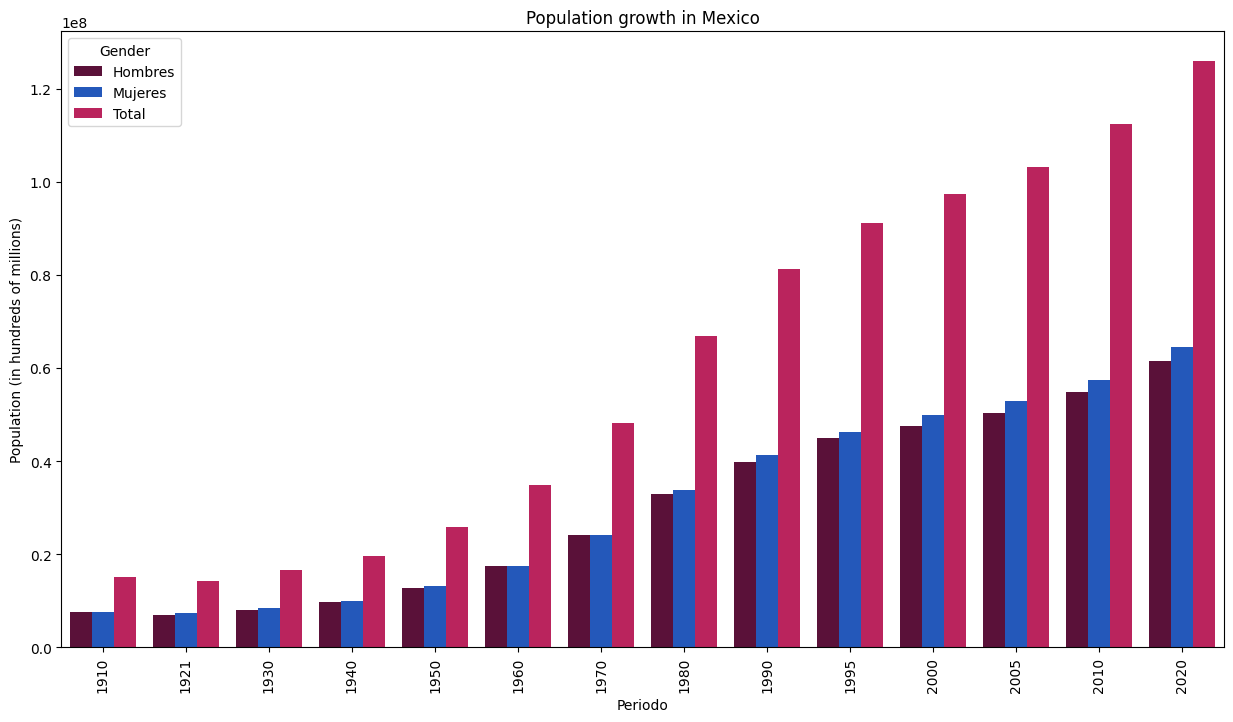

In [7]:
import seaborn as sns
plt.figure(figsize=(15,8))
plt.title('Population growth in Mexico')
sns.barplot(x='Periodo', y='Poblacion', data=df, hue='Categoria', palette=["#66053A","#0B50D3","#D30B57"])
plt.gca().legend().set_title('Gender')
plt.xticks(rotation=90)
plt.ylabel("Population (in hundreds of millions)")
plt.show()

## 2. Mapa del porcentaje de población de 12 años y más económicamente activa por estados.


In [8]:
url=f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000001/es/0700/false/BISE/2.0/{TOKEN}?type=json'
respuesta = requests.get(url)
respuesta.status_code
if respuesta.status_code == 200:
    contenido = json.loads(respuesta.content)

url_lista = []
for i in range(1,33):
    if i < 10:
        url=f"https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6207019030/es/0700000{i}/true/BISE/2.0/{TOKEN}?type=json"
    else:
        url=f"https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6207019030/es/070000{i}/true/BISE/2.0/{TOKEN}?type=json"
    url_lista.append(url)

In [9]:
id_estados=[]
lista_porcentaje=[]
for i in range(1,33):
  respuesta = requests.get(url_lista[i-1])
  if respuesta.status_code == 200:
    contenido =  json.loads(respuesta.content)
  lista_porcentaje.append(contenido['Series'][0]['OBSERVATIONS'][0]['OBS_VALUE'])
  id_estados.append(i)

In [10]:
df_estados = pd.read_csv('datos/Catalogo_entidades.csv')[:32]

In [11]:
df_estados['PORCENTAJE'] = lista_porcentaje
df_estados['PORCENTAJE'] = pd.to_numeric(df_estados['PORCENTAJE'])
df_estados.dtypes

CLAVE_ENTIDAD           int64
ENTIDAD_FEDERATIVA     object
ABREVIATURA            object
PORCENTAJE            float64
dtype: object

In [12]:
geo_estados = 'datos/mexico_estados_geo.json'
mapa = folium.Map(location=[24, -102], zoom_start=5)

In [13]:
folium.Choropleth(
    geo_data=geo_estados,
    data=df_estados,
    columns=['ABREVIATURA', 'PORCENTAJE'],
    key_on='feature.id',
    fill_color='Purples',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Porcentaje de poblacion de 12 años o más economicamente activa'
).add_to(mapa)
mapa

## 3. Mapa de porcentaje de extranjeros viviendo en México por estado

In [14]:
id = []
porcentaje = []
for i in range(1,33):
    if i < 10:
        url = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/3104003001/es/0700000{i}/true/BISE/2.0/{TOKEN}?type=json'
    else:
        url = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/3104003001/es/070000{i}/true/BISE/2.0/{TOKEN}?type=json'
    response = requests.get(url)
    if respuesta.status_code == 200:
        content = json.loads(response.content)
    porcentaje.append(content['Series'][0]['OBSERVATIONS'][0]['OBS_VALUE'])
    id.append(i)

In [15]:
df_es = pd.read_csv('datos/Catalogo_entidades.csv')[:32]
df_es['PORCENTAJE'] = porcentaje
df_es['PORCENTAJE'] = pd.to_numeric(df_es['PORCENTAJE'])

In [16]:
map = folium.Map(location=[24, -102], zoom_start=5)
folium.Choropleth(
    geo_data=geo_estados,
    data=df_es,
    columns=['ABREVIATURA', 'PORCENTAJE'],
    key_on='feature.id',
    fill_color='Purples',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Porcentaje de extranjeros viviendo en México'
).add_to(map)
map

### 4. Mapa de porcentaje de analfabetismo por estado

In [17]:
id = []
porcentaje = []
for i in range(1,33):
    if i < 10:
        url = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/3108001001/es/0700000{i}/true/BISE/2.0/{TOKEN}?type=json'
    else:
        url = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/3108001001/es/070000{i}/true/BISE/2.0/{TOKEN}?type=json'
    respuesta = requests.get(url)
    if respuesta.status_code == 200:
        contenido = json.loads(respuesta.content)
    porcentaje.append(contenido['Series'][0]['OBSERVATIONS'][0]['OBS_VALUE'])
    id.append(i)

In [18]:
df_an = pd.read_csv('datos/Catalogo_entidades.csv')[:32]
df_an['PORCENTAJE'] = porcentaje
df_an['PORCENTAJE'] = pd.to_numeric(df_an['PORCENTAJE'])
df_an

CLAVE_ENTIDAD               ENTIDAD_FEDERATIVA ABREVIATURA  PORCENTAJE
0               1                   AGUASCALIENTES          AS    2.591569
1               2                  BAJA CALIFORNIA          BC    1.952404
2               3              BAJA CALIFORNIA SUR          BS    2.487343
3               4                         CAMPECHE          CC    6.649910
4               5             COAHUILA DE ZARAGOZA          CL    1.969330
5               6                           COLIMA          CM    3.880117
6               7                          CHIAPAS          CS   14.839994
7               8                        CHIHUAHUA          CH    2.602945
8               9                 CIUDAD DE MÉXICO          DF    1.475065
9              10                          DURANGO          DG    3.153828
10             11                       GUANAJUATO          GT    6.349066
11             12                         GUERRERO          GR   13.613486
12             13                          HIDALGO          HG    8.196863
13             14                          JALISCO          JC    3.524468
14             15                           MÉXICO          MC    3.337071
15             16              MICHOACÁN DE OCAMPO          MN    8.274528
16             17                          MORELOS          MS    4.955196
17             18                          NAYARIT          NT    5.035960
18             19                       NUEVO LEÓN          NL    1.626291
19             20                           OAXACA          OC   13.307606
20             21                           PUEBLA          PL    8.316767
21             22                        QUERÉTARO          QT    4.535718
22             23                     QUINTANA ROO          QR    3.871618
23             24                  SAN LUIS POTOSÍ          SP    6.280185
24             25                          SINALOA          SL    4.156941
25             26                           SONORA          SR    2.169044
26             27                          TABASCO          TC    5.356582
27             28                       TAMAULIPAS          TS    3.004637
28             29                         TLAXCALA          TL    3.948596
29             30  VERACRUZ DE IGNACIO DE LA LLAVE          VZ    9.442452
30             31                          YUCATÁN          YN    7.412807
31             32                        ZACATECAS          ZS    4.387647

In [19]:
map = folium.Map(location=[24, -102], zoom_start=5)
folium.Choropleth(
    geo_data=geo_estados,
    data=df_an,
    columns=['ABREVIATURA', 'PORCENTAJE'],
    key_on='feature.id',
    fill_color='Greys',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Porcentaje de poblacion analfabeta en México'
).add_to(map)
map

### RETO. Porcentaje de población que no posee nacionalidad mexicana en Yucatan

In [20]:
id_yuc = []
porcentaje_yuc = []
for i in range(1,107):
    if i < 10:
        url = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6207019025/es/07000031000{i}/true/BISE/2.0/{TOKEN}?type=json'
    elif 10 <= i < 100:
        url = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6207019025/es/0700003100{i}/true/BISE/2.0/{TOKEN}?type=json'
    else:
        url = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6207019025/es/070000310{i}/true/BISE/2.0/{TOKEN}?type=json'

    respuesta = requests.get(url)
    if respuesta.status_code == 200:
        contenido = json.loads(respuesta.content)
    porcentaje_yuc.append(contenido['Series'][0]['OBSERVATIONS'][0]['OBS_VALUE'])
    id_yuc.append(i)

In [22]:
with open('datos/geo_yuc.json', 'r', encoding='utf-8') as file:
    geo_data = json.load(file)
municipios = []

for municipio in geo_data['features']:
    data = {
        'Nombre': municipio['properties']['NOMGEO'],
        'CVE_MUN': municipio['properties']['CVE_MUN']
        }
    municipios.append(data)
df_municipios = pd.DataFrame(municipios)
df_municipios

Nombre CVE_MUN
0         Ucú     100
1      Espita     032
2       Homún     036
3        Peto     058
4        Maní     047
..        ...     ...
101   Tizimín     096
102    Tunkás     097
103     Uayma     099
104  Yaxkukul     105
105    Yobaín     106

[106 rows x 2 columns]

In [23]:
df_municipios = df_municipios.sort_values(by='CVE_MUN').reset_index(drop=True)


In [24]:
df_municipios['PORCENTAJE'] = porcentaje_yuc
df_municipios['PORCENTAJE'] = pd.to_numeric(df_municipios['PORCENTAJE'])

In [25]:
df_municipios

Nombre CVE_MUN  PORCENTAJE
0         Abalá     001    0.000000
1       Acanceh     002    0.000000
2          Akil     003    0.070721
3          Baca     004    0.034417
4        Bokobá     005    0.000000
..          ...     ...         ...
101  Valladolid     102    0.056031
102     Xocchel     103    0.000000
103     Yaxcabá     104    0.000000
104    Yaxkukul     105    0.000000
105      Yobaín     106    0.044903

[106 rows x 3 columns]

In [26]:
mapa_yuc = folium.Map(location=[20.99539426182864, -89.56106201594437], zoom_start=8)
geo_municipios = 'datos/geo_yuc.json'
folium.Choropleth(
    geo_data=geo_municipios,
    data=df_municipios,
    columns=['CVE_MUN', 'PORCENTAJE'],
    key_on="feature.properties.CVE_MUN",
    fill_color='Greys',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Porcentaje de población que no posee nacionalidad mexicana en Yucatan'
).add_to(mapa_yuc)
mapa_yuc

### 5. Graficas de analfabetismo y poblacion con educación media superior de los estados de México

In [27]:
#Obtenemos los del porcentaje de la población de 15 años o más con instrucción media superior por estado.
id = []
porcentaje_ems = []
for i in range(1,33):
    if i < 10:
        url = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6200240314/es/0700000{i}/true/BISE/2.0/{TOKEN}?type=json'
    else:
        url = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6200240314/es/070000{i}/true/BISE/2.0/{TOKEN}?type=json'
    respuesta = requests.get(url)
    if respuesta.status_code == 200:
        contenido = json.loads(respuesta.content)
    porcentaje_ems.append(contenido['Series'][0]['OBSERVATIONS'][0]['OBS_VALUE'])
    id.append(i)


In [53]:
df_ems = pd.read_csv('datos/Catalogo_entidades.csv')[:32]
df_ems['Porcentaje EMS'] = porcentaje_ems
df_ems['Porcentaje EMS'] = pd.to_numeric(df_ems['Porcentaje EMS'])
df_ems

CLAVE_ENTIDAD               ENTIDAD_FEDERATIVA ABREVIATURA  Porcentaje EMS
0               1                   AGUASCALIENTES          AS       23.597657
1               2                  BAJA CALIFORNIA          BC       27.979655
2               3              BAJA CALIFORNIA SUR          BS       29.164156
3               4                         CAMPECHE          CC       22.269533
4               5             COAHUILA DE ZARAGOZA          CL       24.913570
5               6                           COLIMA          CM       23.966872
6               7                          CHIAPAS          CS       18.241452
7               8                        CHIHUAHUA          CH       23.805843
8               9                 CIUDAD DE MÉXICO          DF       27.639769
9              10                          DURANGO          DG       22.676389
10             11                       GUANAJUATO          GT       21.025966
11             12                         GUERRERO          GR       21.872415
12             13                          HIDALGO          HG       23.003107
13             14                          JALISCO          JC       23.714334
14             15                           MÉXICO          MC       27.125567
15             16              MICHOACÁN DE OCAMPO          MN       19.171875
16             17                          MORELOS          MS       24.698057
17             18                          NAYARIT          NT       24.163447
18             19                       NUEVO LEÓN          NL       25.475716
19             20                           OAXACA          OC       18.538463
20             21                           PUEBLA          PL       21.865941
21             22                        QUERÉTARO          QT       23.149962
22             23                     QUINTANA ROO          QR       28.733157
23             24                  SAN LUIS POTOSÍ          SP       22.327073
24             25                          SINALOA          SL       24.987027
25             26                           SONORA          SR       26.747444
26             27                          TABASCO          TC       25.433430
27             28                       TAMAULIPAS          TS       25.775652
28             29                         TLAXCALA          TL       24.484261
29             30  VERACRUZ DE IGNACIO DE LA LLAVE          VZ       21.743559
30             31                          YUCATÁN          YN       22.552535
31             32                        ZACATECAS          ZS       19.005817

In [29]:
#Obtenemos los datos de analfabetismo
id = []
porcentaje_an = []
for i in range(1,33):
    if i < 10:
        url = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/3108001001/es/0700000{i}/true/BISE/2.0/{TOKEN}?type=json'
    else:
        url = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/3108001001/es/070000{i}/true/BISE/2.0/{TOKEN}?type=json'
    respuesta = requests.get(url)
    if respuesta.status_code == 200:
        contenido = json.loads(respuesta.content)
    porcentaje_an.append(contenido['Series'][0]['OBSERVATIONS'][0]['OBS_VALUE'])
    id.append(i)


In [34]:
#Agrego el porcentaje de analfabetas al DataFrame
df_ems['Porcentaje Analfabeta'] = porcentaje_an
df_ems['Porcentaje Analfabeta'] = pd.to_numeric(df_ems['Porcentaje Analfabeta'])
#Me quedo con las columnas que me interesan
df_filtrado=df_ems[['ENTIDAD_FEDERATIVA','Porcentaje Analfabeta','Porcentaje EMS']]
df = pd.melt(df_filtrado, id_vars='ENTIDAD_FEDERATIVA',
            var_name='Categoria', value_name='Porcentaje')
df

NameError: name 'porcentaje_an' is not defined

c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

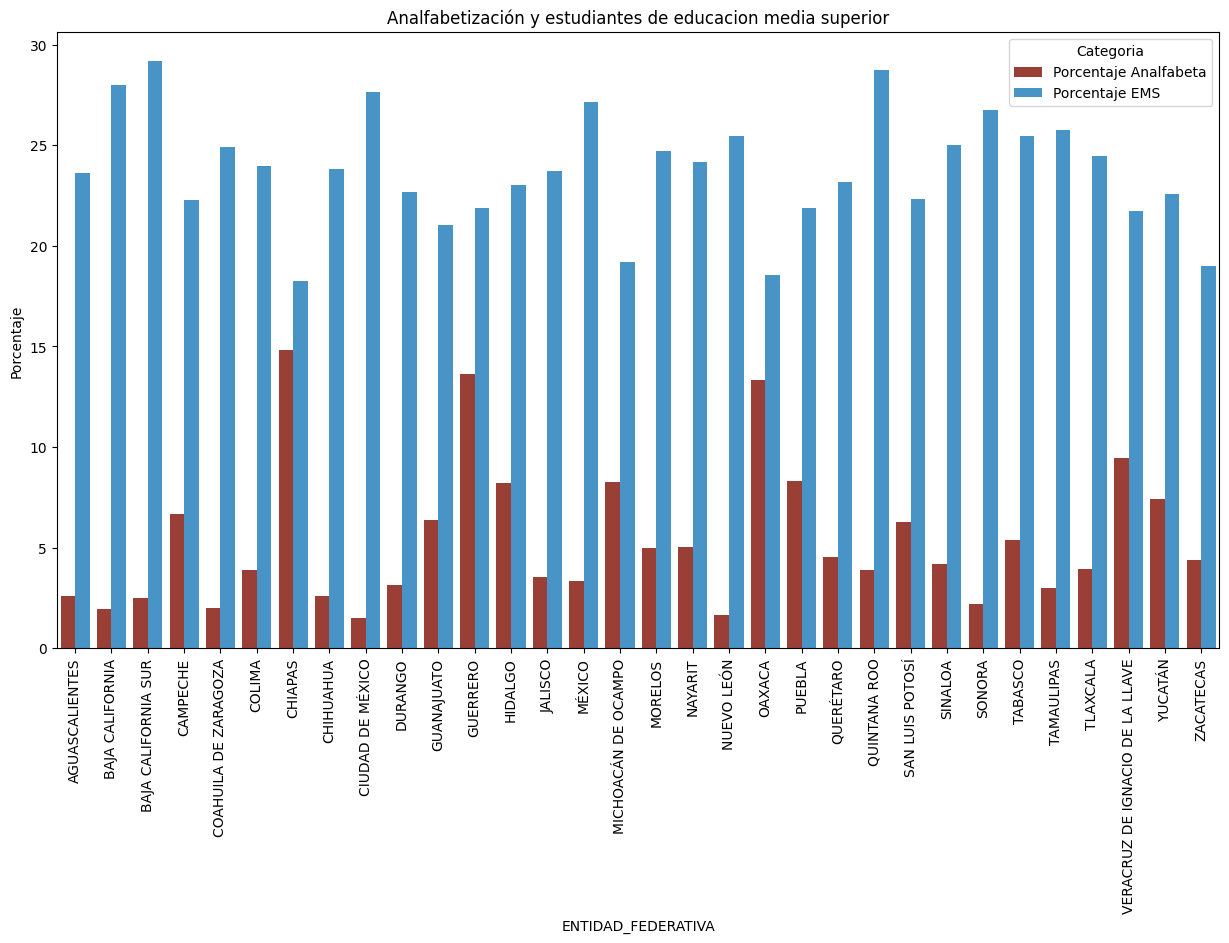

In [71]:
import seaborn as sns
bar=plt.figure(figsize=(15,8))
plt.title('Analfabetización y estudiantes de educacion media superior')
sns.barplot(x='ENTIDAD_FEDERATIVA', y='Porcentaje', data=df, hue='Categoria', palette=["#A93226","#3498DB"])
plt.gca().legend().set_title('Categoria')
plt.xticks(rotation=90)
plt.ylabel("Porcentaje")
plt.show()

#### Victimas de delitos ocurridos en hombres y mujeres a nivel nacional

In [47]:
#Obtenemos la informacion de los hombres
id = []
delitos_hombres = []
for i in range(1,33):
    if i < 10:
        url = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6204327038/es/0700000{i}/true/BISE/2.0/{TOKEN}?type=json'
    else:
        url = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6204327038/es/070000{i}/true/BISE/2.0/{TOKEN}?type=json'  
    respuesta = requests.get(url)
    if respuesta.status_code == 200:
        contenido = json.loads(respuesta.content)
    delitos_hombres.append(contenido['Series'][0]['OBSERVATIONS'][0]['OBS_VALUE'])
    id.append(i)


In [43]:
#Obtenemos la información de las mujeres
delitos_mujeres = []
for i in range(1,33):
    if i < 10:
        url = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6204327039/es/0700000{i}/true/BISE/2.0/{TOKEN}?type=json'
    else:
        url = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6204327039/es/070000{i}/true/BISE/2.0/{TOKEN}?type=json'  
    respuesta = requests.get(url)
    if respuesta.status_code == 200:
        contenido = json.loads(respuesta.content)
    delitos_mujeres.append(contenido['Series'][0]['OBSERVATIONS'][0]['OBS_VALUE'])



In [82]:
df_delitos = pd.read_csv('datos/Catalogo_entidades.csv')[:32]
df_delitos['Hombres'] = delitos_hombres
df_delitos['Hombres'] = pd.to_numeric(df_delitos['Hombres'])/1000
df_delitos['Mujeres'] = delitos_mujeres
df_delitos['Mujeres'] = pd.to_numeric(df_delitos['Mujeres'])/1000
#Los datos están determinados en miles de personas
df = pd.melt(df_delitos[['ENTIDAD_FEDERATIVA','Hombres','Mujeres']], id_vars='ENTIDAD_FEDERATIVA',
            var_name='Categoria', value_name='Delitos')
df_delitos

CLAVE_ENTIDAD               ENTIDAD_FEDERATIVA ABREVIATURA  Hombres  \
0               1                   AGUASCALIENTES          AS   36.467   
1               2                  BAJA CALIFORNIA          BC   93.131   
2               3              BAJA CALIFORNIA SUR          BS   16.214   
3               4                         CAMPECHE          CC   22.037   
4               5             COAHUILA DE ZARAGOZA          CL   89.726   
5               6                           COLIMA          CM   18.600   
6               7                          CHIAPAS          CS   78.049   
7               8                        CHIHUAHUA          CH   95.269   
8               9                 CIUDAD DE MÉXICO          DF  298.055   
9              10                          DURANGO          DG   34.124   
10             11                       GUANAJUATO          GT  100.304   
11             12                         GUERRERO          GR   52.016   
12             13                          HIDALGO          HG   67.379   
13             14                          JALISCO          JC  271.965   
14             15                           MÉXICO          MC  652.255   
15             16              MICHOACÁN DE OCAMPO          MN   92.578   
16             17                          MORELOS          MS   42.082   
17             18                          NAYARIT          NT   28.052   
18             19                       NUEVO LEÓN          NL  198.085   
19             20                           OAXACA          OC   79.596   
20             21                           PUEBLA          PL  196.003   
21             22                        QUERÉTARO          QT   79.083   
22             23                     QUINTANA ROO          QR   66.063   
23             24                  SAN LUIS POTOSÍ          SP   69.688   
24             25                          SINALOA          SL   58.546   
25             26                           SONORA          SR   78.944   
26             27                          TABASCO          TC   56.335   
27             28                       TAMAULIPAS          TS   62.188   
28             29                         TLAXCALA          TL   51.377   
29             30  VERACRUZ DE IGNACIO DE LA LLAVE          VZ   97.561   
30             31                          YUCATÁN          YN   56.962   
31             32                        ZACATECAS          ZS   29.308   

    Mujeres  
0    52.345  
1   108.065  
2    19.269  
3    22.206  
4   111.411  
5    19.050  
6    69.084  
7    99.466  
8   368.694  
9    45.581  
10  156.270  
11   67.467  
12   66.711  
13  240.506  
14  561.040  
15   83.655  
16   59.457  
17   26.048  
18  166.824  
19   75.025  
20  215.162  
21   78.148  
22   53.936  
23   78.577  
24   90.998  
25   96.007  
26   64.781  
27   65.245  
28   45.597  
29  165.800  
30   54.596  
31   24.489

c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

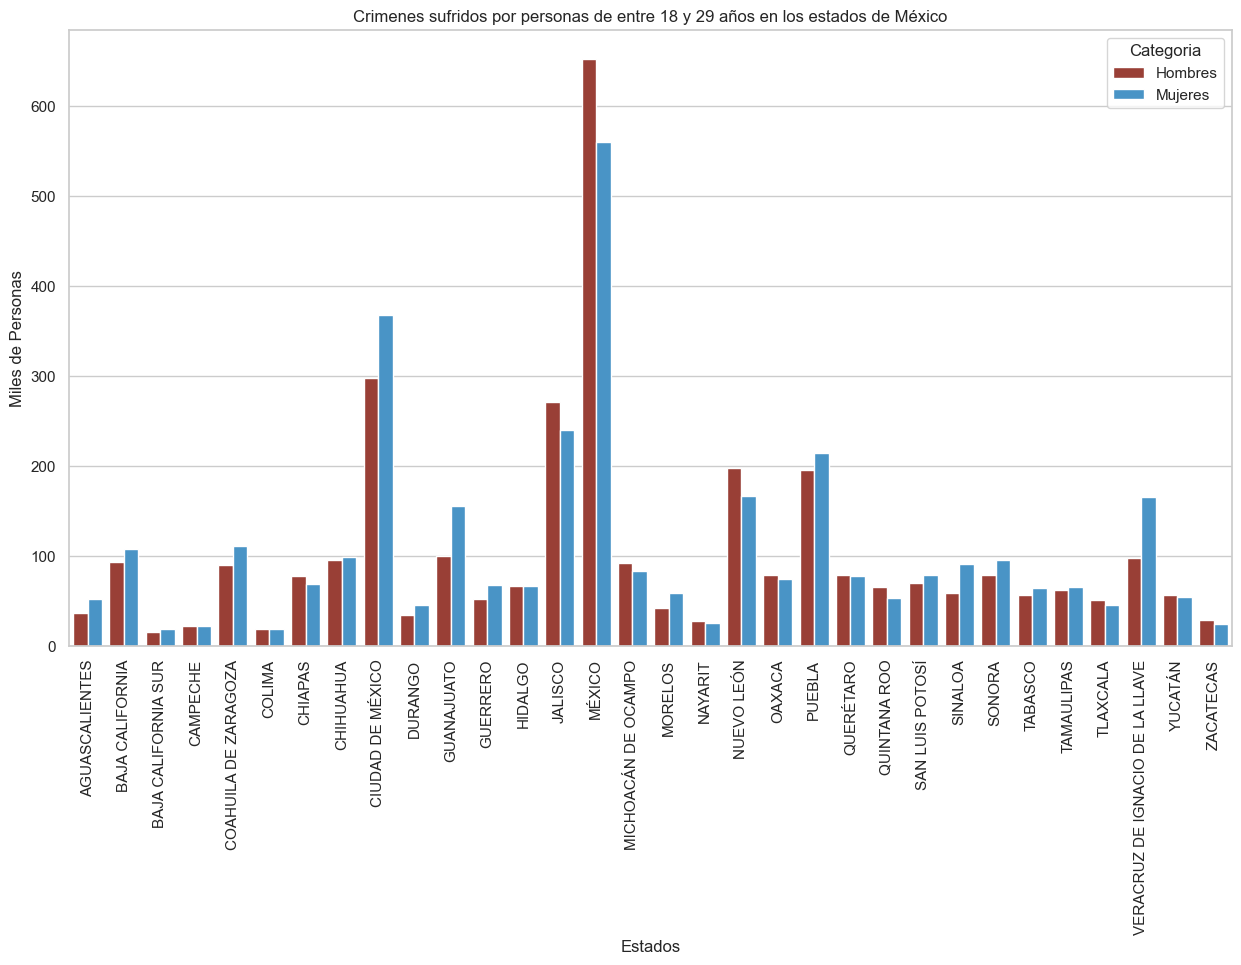

In [84]:
import seaborn as sns
bar=plt.figure(figsize=(15,8))
plt.title('Crimenes sufridos por personas de entre 18 y 29 años en los estados de México')
ax=sns.barplot(x='ENTIDAD_FEDERATIVA', y='Delitos', data=df, hue='Categoria', palette=["#A93226","#3498DB"])
plt.xticks(rotation=90)
plt.gca().legend().set_title('Categoria')
plt.ylabel("Miles de Personas")
plt.xlabel("Estados")
plt.show()

c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
40   23.9     9.082    9.799          22.944       19.359       858.97   
34   23.9     5.497   10.038          23.661       20.554       688.75   
48   23.8     8.092    6.664          23.086       20.706       992.61   
3    22.4     4.032    5.824          21.056       21.280       827.34   
17   21.4     4.066    4.922          16.692       16.264       872.51   
26   21.4     8.346    9.416          17.976       18.190       816.21   
18   20.5     7.175    6.765          14.965       20.090      1281.55   
36   19.9     6.368    5.771          18.308       18.706       881.51   
42   19.5     4.095    5.655          15.990       15.795       767.91   
43   19.4     7.760    7.372          17.654       16.878      1004.75   
41   19.4     6.014    6.402          19.012       16.684       669.31   
0    18.8     7.332    5.640          18.048       15.040       784.55   
2    18.6     6.510    5.208          15.624       17.856       899.47   
31   18.4     3.496    4.968          12.328       18.032       869.85   
38   18.2     9.100    5.642          17.472       16.016       905.99   
1    18.1     7.421    4.525          16.290       17.014      1053.48   
9    17.9     3.759    5.191          16.468       16.826      1160.13   
16   17.8     4.806    4.272          13.706       15.130       780.45   
24   17.6     2.640    5.456           1.760       17.600       896.07   
11   17.5     9.450    7.175          14.350       15.225       861.18   
50   17.4     7.308    5.568          14.094       15.660       791.14   
33   16.8     6.552    5.208          15.792       13.608       708.24   
7    16.2     6.156    4.860          14.094       16.038      1137.87   
25   16.1     6.923    5.474          14.812       13.524       790.32   
15   15.7     2.669    3.925          15.229       13.659       649.06   
10   15.6     2.964    3.900          14.820       14.508       913.15   
12   15.3     5.508    4.437          13.005       14.994       641.96   
19   15.1     5.738    4.530          13.137       12.684       661.88   
27   14.9     1.937    5.215          13.857       13.410       732.28   
28   14.7     5.439    4.704          13.965       14.553      1029.87   
14   14.5     3.625    4.205          13.775       13.775       710.46   
35   14.1     3.948    4.794          13.959       11.562       697.73   
22   14.1     3.384    3.948          13.395       10.857      1110.61   
49   13.8     4.968    4.554           5.382       11.592       670.31   
45   13.6     4.080    4.080          13.056       12.920       716.20   
5    13.6     5.032    3.808          10.744       12.920       835.50   
13   12.8     4.608    4.352          12.032       12.288       803.11   
37   12.8     4.224    3.328           8.576       11.520       804.71   
46   12.7     2.413    3.429          11.049       11.176       768.95   
20   12.5     4.250    4.000           8.875       12.375      1048.78   
32   12.3     3.936    3.567          10.824        9.840      1234.31   
4    12.0     4.200    3.360          10.920       10.680       878.41   
29   11.6     4.060    3.480          10.092        9.628       746.54   
44   11.3     4.859    1.808           9.944       10.848       809.38   
30   11.2     1.792    3.136           9.632        8.736      1301.52   
39   11.1     3.774    4.218          10.212        8.769      1148.99   
6    10.8     4.968    3.888           9.396        8.856      1068.73   
47   10.6     4.452    3.498           8.692        9.116       890.03   
23    9.6     2.208    2.784           8.448        8.448       777.18   
21    8.2     1.886    2.870           7.134        6.560      1011.14   
8     5.9     2.006    1.593           5.900        5.900      1273.89   

    ins_losses abbrev  
40      116.29     SC  
34      109.72     ND  
48      152.56     WV  
3       142.39     AR  
17      137.13     KY  
26       85

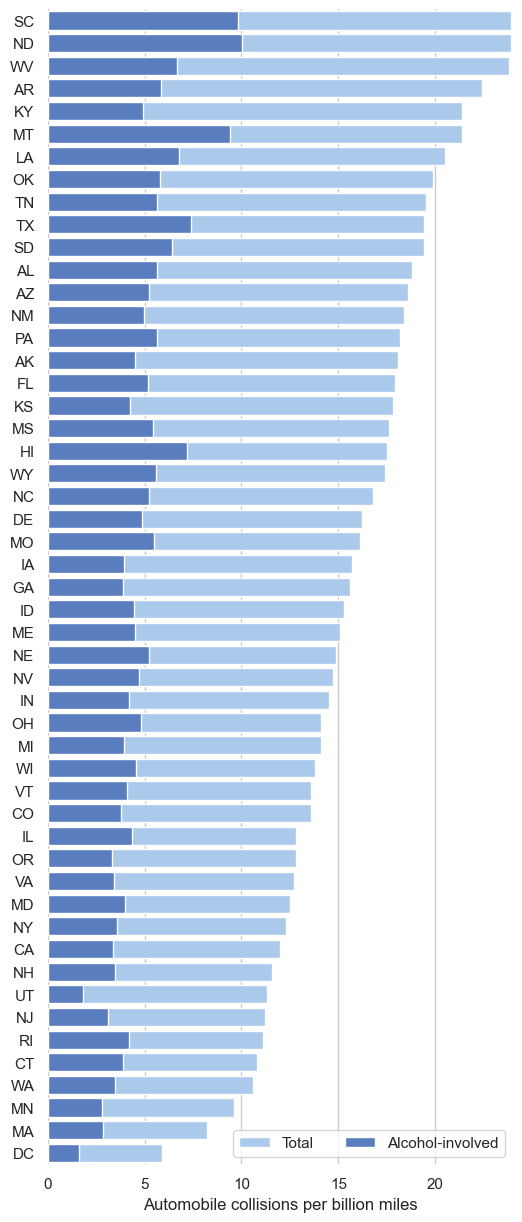

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)
crashes